In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import fashion_mnist, cifar10
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load Fashion MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

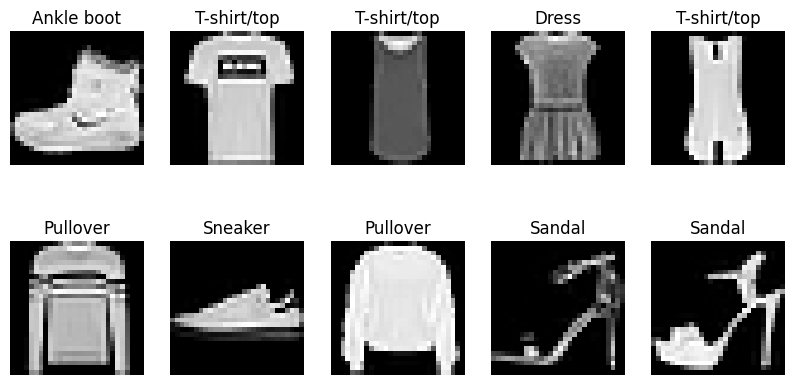

In [ ]:
# EDA: Display sample images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.show()

In [ ]:
# Normalize images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Build Neural Network Model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train Model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.7589 - loss: 0.6816 - val_accuracy: 0.8438 - val_loss: 0.4333
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.8542 - loss: 0.4060 - val_accuracy: 0.8530 - val_loss: 0.4086
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8647 - loss: 0.3732 - val_accuracy: 0.8672 - val_loss: 0.3723
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8696 - loss: 0.3527 - val_accuracy: 0.8701 - val_loss: 0.3584
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8796 - loss: 0.3264 - val_accuracy: 0.8700 - val_loss: 0.3548
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.8799 - loss: 0.3217 - val_accuracy: 0.8772 - val_loss: 0.3505
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8869 - loss: 0.3062 - val_accuracy: 0.8716 - val_loss: 0.3525
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8888 - loss: 0.

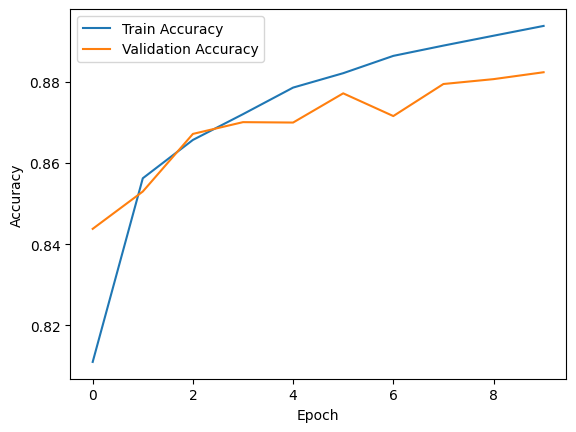

In [ ]:
# Plot Training Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **Q. If we invert pixel values of the Mnist dataset will a model train on the original images, still perform accurately?**

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4006 - loss: 2.0369 - val_accuracy: 0.7333 - val_loss: 0.7827
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6274 - loss: 1.0088 - val_accuracy: 0.7551 - val_loss: 0.6851
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6844 - loss: 0.8670 - val_accuracy: 0.7799 - val_loss: 0.6139
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7276 - loss: 0.7599 - val_accuracy: 0.7888 - val_loss: 0.5901
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7471 - loss: 0.7073 - val_accuracy: 0.8018 - val_loss: 0.5408


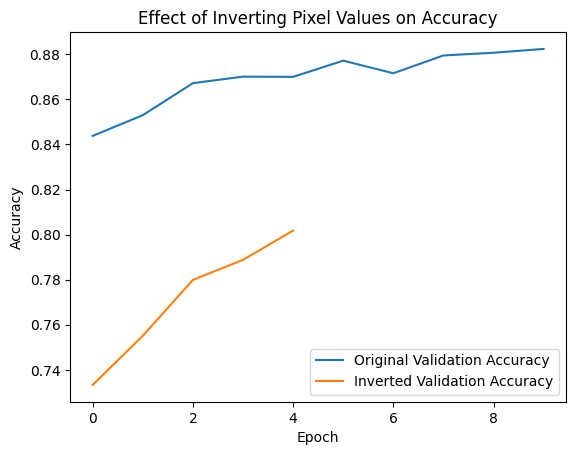

In [ ]:
# Invert Image Pixels
inverted_train = 1 - train_images
inverted_test = 1 - test_images
history_inverted = model.fit(inverted_train, train_labels, epochs=5, validation_data=(inverted_test, test_labels))

# Compare accuracy before and after inversion
plt.plot(history.history['val_accuracy'], label='Original Validation Accuracy')
plt.plot(history_inverted.history['val_accuracy'], label='Inverted Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Effect of Inverting Pixel Values on Accuracy')
plt.show()

## **Q. How could adding random noise to images impact the classification accuracy of the training model?**

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7976 - loss: 0.8129 - val_accuracy: 0.8519 - val_loss: 0.4200
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8584 - loss: 0.3836 - val_accuracy: 0.8516 - val_loss: 0.4118
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8641 - loss: 0.3608 - val_accuracy: 0.8521 - val_loss: 0.4098
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8726 - loss: 0.3371 - val_accuracy: 0.8558 - val_loss: 0.4053
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8744 - loss: 0.3306 - val_accuracy: 0.8546 - val_loss: 0.4138


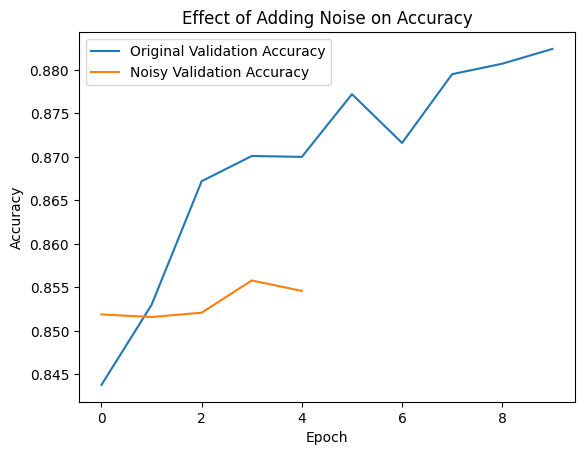

In [ ]:
# Add Noise to Images
noise_factor = 0.2
train_images_noisy = train_images + noise_factor * np.random.randn(*train_images.shape)
test_images_noisy = test_images + noise_factor * np.random.randn(*test_images.shape)
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)
history_noisy = model.fit(train_images_noisy, train_labels, epochs=5, validation_data=(test_images_noisy, test_labels))

# Compare accuracy before and after adding noise
plt.plot(history.history['val_accuracy'], label='Original Validation Accuracy')
plt.plot(history_noisy.history['val_accuracy'], label='Noisy Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Effect of Adding Noise on Accuracy')
plt.show()

## **Q. Is it possible to achieve higher accuracy on fashion Mnist dataset by resizing the image resolution from 28*28 to 56*56?**

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.7500 - loss: 0.6996 - val_accuracy: 0.8231 - val_loss: 0.4739
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 0.8293 - loss: 0.4573 - val_accuracy: 0.8477 - val_loss: 0.4176
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - accuracy: 0.8476 - loss: 0.4150 - val_accuracy: 0.8577 - val_loss: 0.3961
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8516 - loss: 0.4060 - val_accuracy: 0.8602 - val_loss: 0.3885
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.8587 - loss: 0.3894 - val_accuracy: 0.8594 - val_loss: 0.3889
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8610 - loss: 0.3779 - val_accuracy: 0.8624 - val_loss: 0.3883
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8636 - loss: 0.3717 - val_accuracy: 0.8666 - val_loss: 0.3803
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.8656 -

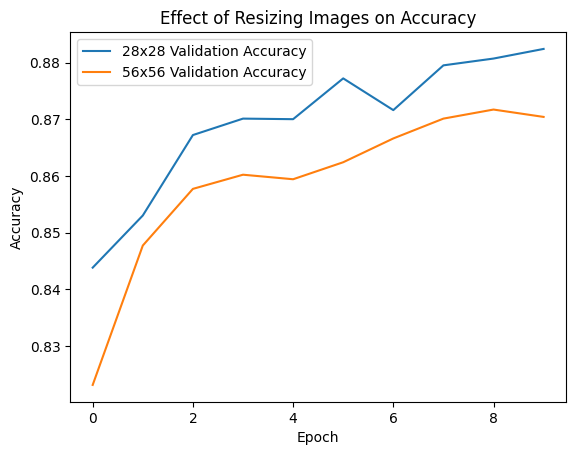

In [ ]:
# Resize to 56x56
train_images_resized = tf.image.resize(train_images[..., np.newaxis], (56, 56)).numpy()
test_images_resized = tf.image.resize(test_images[..., np.newaxis], (56, 56)).numpy()

model_large = Sequential([
    Flatten(input_shape=(56, 56)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])
model_large.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_large = model_large.fit(train_images_resized, train_labels, epochs=10, validation_data=(test_images_resized, test_labels))

# Compare accuracy before and after resizing
plt.plot(history.history['val_accuracy'], label='28x28 Validation Accuracy')
plt.plot(history_large.history['val_accuracy'], label='56x56 Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Effect of Resizing Images on Accuracy')
plt.show()

## **Q. Can a train model on to classify fashion Mnist image generalize to classify images from different fashion dataset (cifar10)?**

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1390 - loss: 2.5180 - val_accuracy: 0.1784 - val_loss: 2.1716
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1715 - loss: 2.1985 - val_accuracy: 0.1954 - val_loss: 2.1376
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.1875 - loss: 2.1701 - val_accuracy: 0.2318 - val_loss: 2.1026
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.2120 - loss: 2.1309 - val_accuracy: 0.2634 - val_loss: 2.0555
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.2207 - loss: 2.1136 - val_accuracy: 0.2537 - val_loss: 2.0634


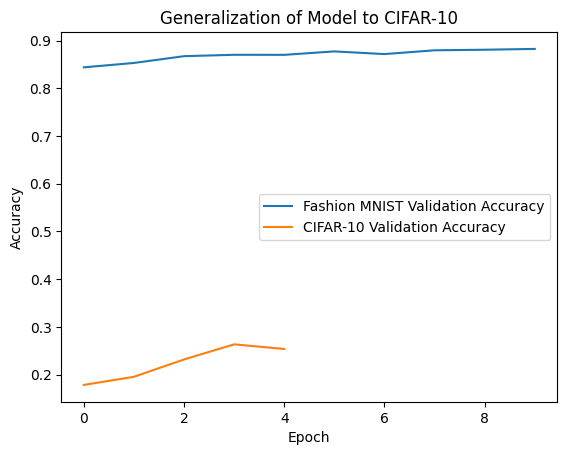

In [ ]:
# Test Generalization on CIFAR-10
def preprocess_cifar10():
    (cifar_train, cifar_labels), (cifar_test, cifar_test_labels) = cifar10.load_data()

    # Convert images to grayscale, resize to 28x28, and normalize
    cifar_train_gray = tf.image.rgb_to_grayscale(tf.cast(cifar_train, tf.float32)) / 255.0
    cifar_test_gray = tf.image.rgb_to_grayscale(tf.cast(cifar_test, tf.float32)) / 255.0

    # Resize CIFAR-10 images to 28x28 to match Fashion MNIST model
    cifar_train_resized = tf.image.resize(cifar_train_gray, (28, 28)).numpy()
    cifar_test_resized = tf.image.resize(cifar_test_gray, (28, 28)).numpy()

    # Convert labels to int32
    return (
        cifar_train_resized, cifar_labels.astype(np.int32).flatten(),
        cifar_test_resized, cifar_test_labels.astype(np.int32).flatten()
    )

# Preprocess CIFAR-10 dataset
cifar_train, cifar_labels, cifar_test, cifar_test_labels = preprocess_cifar10()

# Train model on CIFAR-10 grayscale images resized to 28x28
history_cifar = model.fit(cifar_train, cifar_labels, epochs=5, validation_data=(cifar_test, cifar_test_labels))

# Compare accuracy between Fashion MNIST and CIFAR-10 generalization
plt.plot(history.history['val_accuracy'], label='Fashion MNIST Validation Accuracy')
plt.plot(history_cifar.history['val_accuracy'], label='CIFAR-10 Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Generalization of Model to CIFAR-10')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


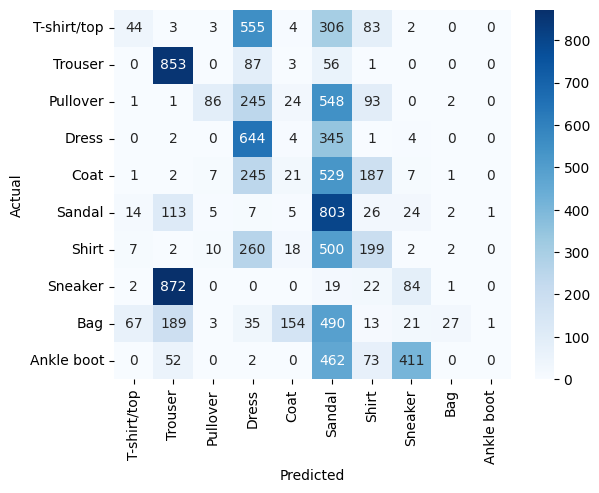

In [ ]:
# Generate Confusion Matrix & Classification Report
y_pred = np.argmax(model.predict(test_images), axis=1)
conf_matrix = confusion_matrix(test_labels, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


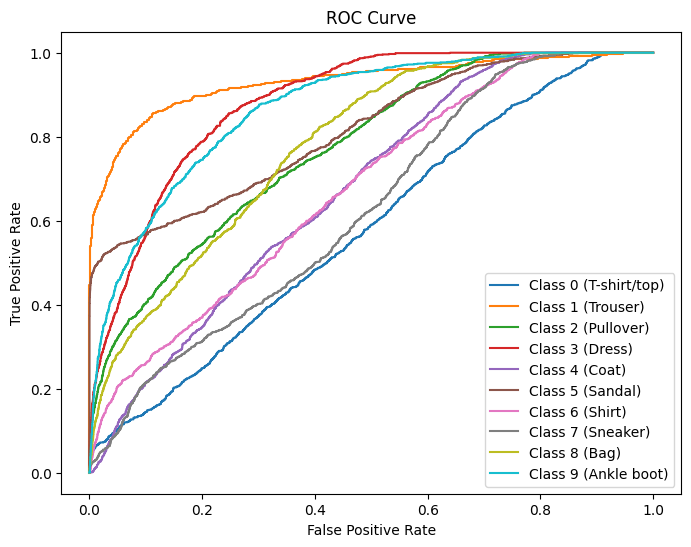

In [ ]:
# ROC Curve
y_score = model.predict(test_images)
y_test_bin = to_categorical(test_labels, num_classes=10)
plt.figure(figsize=(8, 6))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} ({class_names[i]})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
# Final Model Summary & Observations
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

None
